2.17.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 39ms/step - accuracy: 0.8848 - loss: 0.3672 - val_accuracy: 0.9813 - val_loss: 0.0583
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9846 - loss: 0.0490 - val_accuracy: 0.9851 - val_loss: 0.0420
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9897 - loss: 0.0328 - val_accuracy: 0.9913 - val_loss: 0.0287
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9924 - loss: 0.0226 - val_accuracy: 0.9894 - val_loss: 0.0341
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9942 - loss: 0.0180 - val_accuracy: 0.9911 - val_loss: 0.0293
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9885 - loss: 0.0333
Test Accuracy: 99.11%


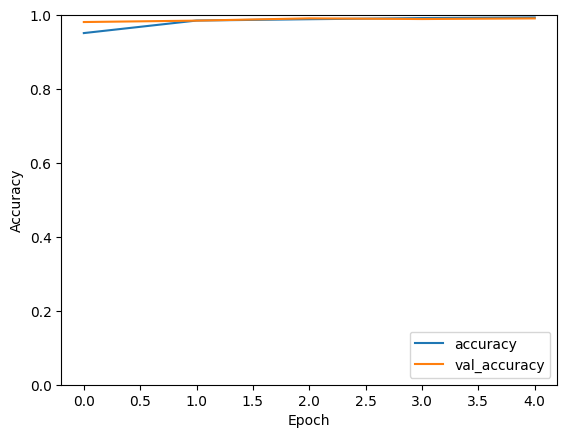

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Predicted label: 7
True label: 7


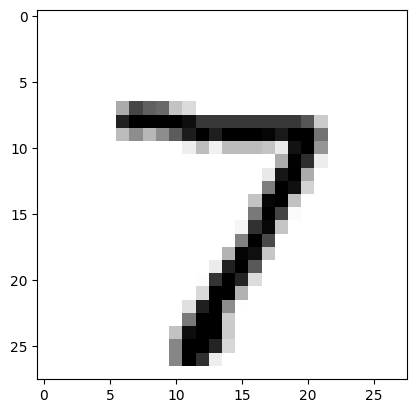

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


print(tf.__version__)

# Step 1: Load and Prepare the Data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Step 2: Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Step 3: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the Model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

# Step 5: Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy: {:.2f}%".format(test_acc * 100))

# Step 6: Visualize Training Results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Step 7: Make Predictions
predictions = model.predict(test_images)
print("Predicted label:", np.argmax(predictions[0]))
print("True label:", test_labels[0])

# Display the first test image
plt.figure()
plt.imshow(test_images[0].reshape(28, 28), cmap=plt.cm.binary)
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.3421 - loss: 1.7711 - val_accuracy: 0.5442 - val_loss: 1.2684
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.5604 - loss: 1.2251 - val_accuracy: 0.6056 - val_loss: 1.1150
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.6294 - loss: 1.0570 - val_accuracy: 0.6441 - val_loss: 1.0215
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.6695 - loss: 0.9440 - val_accuracy: 0.6591 - val_loss: 0.9613
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.6969 - loss: 0.8749 - val_accuracy: 0.6742 - val_loss: 0.9391
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.7160 - loss: 0.8165 - val_accuracy: 0.6944 - val_loss: 0.8835
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.7315 - loss: 0.7694 - val_accuracy: 0.7027 - val_loss: 0.8531
Epoch 8/10
1563/1563 ━━

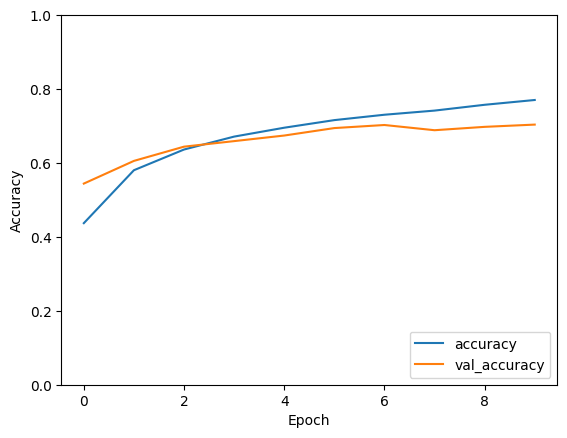

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Predicted label: 3
True label: [3]


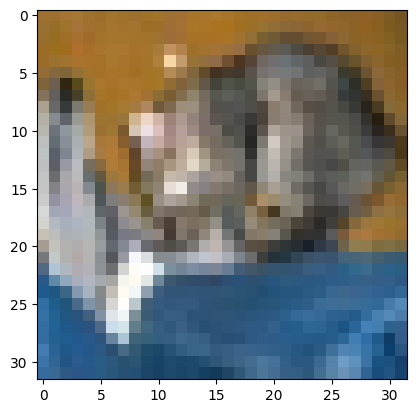

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load and Prepare the CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Step 2: Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Step 3: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the Model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Step 5: Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy: {:.2f}%".format(test_acc * 100))

# Step 6: Visualize Training Results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Step 7: Make Predictions
predictions = model.predict(test_images)

# Display the first test image and its predicted label
print("Predicted label:", np.argmax(predictions[0]))
print("True label:", test_labels[0])

plt.figure()
plt.imshow(test_images[0])
plt.show()
